# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

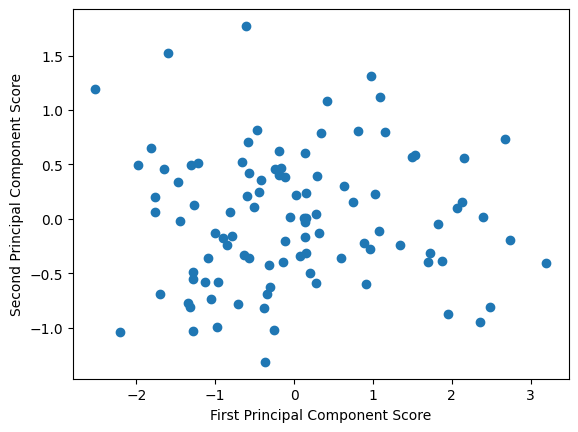

In [55]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df_1 = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df_1 = df_1 - df_1.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df_1)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df_1.dot(pca3.components_[0])
second_principal_component_score = df_1.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

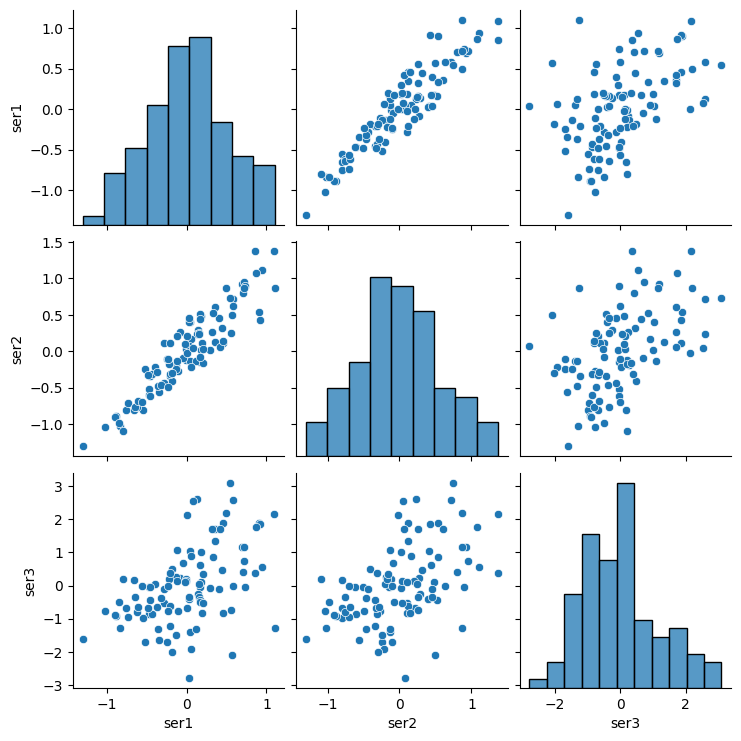

In [56]:
# Create the pairplot
sns.pairplot(df_1)
plt.show()



---



---


**Explanation of the Graph and Outliers**
* The scatter plot shows the relationship between the first and second principal component scores (PC1 and PC2) from PCA on three series (ser1, ser2, ser3).


---


**Outliers in the Upper Left:**

* These outliers have low PC1 and high PC2 scores, meaning they deviate from the main data trend in both components.


---


**Implications for ser1, ser2, and ser3:**

* ser3 is likely driving the outliers, with extreme values in ser3 but more stable values in ser1 and ser2.

* ser1 and ser2 are highly correlated, making it hard to distinguish them in PCA.


---


**Difficulty with ser1 and ser2:**

* Because ser2 is derived from ser1, PCA doesn't add much insight beyond the first component.

* Advantages of the PCA Scatter Plot:
Dimensionality Reduction: Simplifies the relationships between variables.
---
**Outlier Detection:**
* Highlights unusual data points.
---
**Variance Insight:**
* Shows how data aligns with principal components.
---
**Disadvantages:**
* Variable Interpretability: PCA axes don't directly correspond to original variables.
---
**Correlated Variables:**
* Doesn't provide much insight for highly correlated series like ser1 and ser2.
---
**Outlier Ambiguity:**
* Outliers may be influenced by ser3, but this isn’t clear from the plot.
---
---

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

In [11]:
df = pd.read_csv('amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


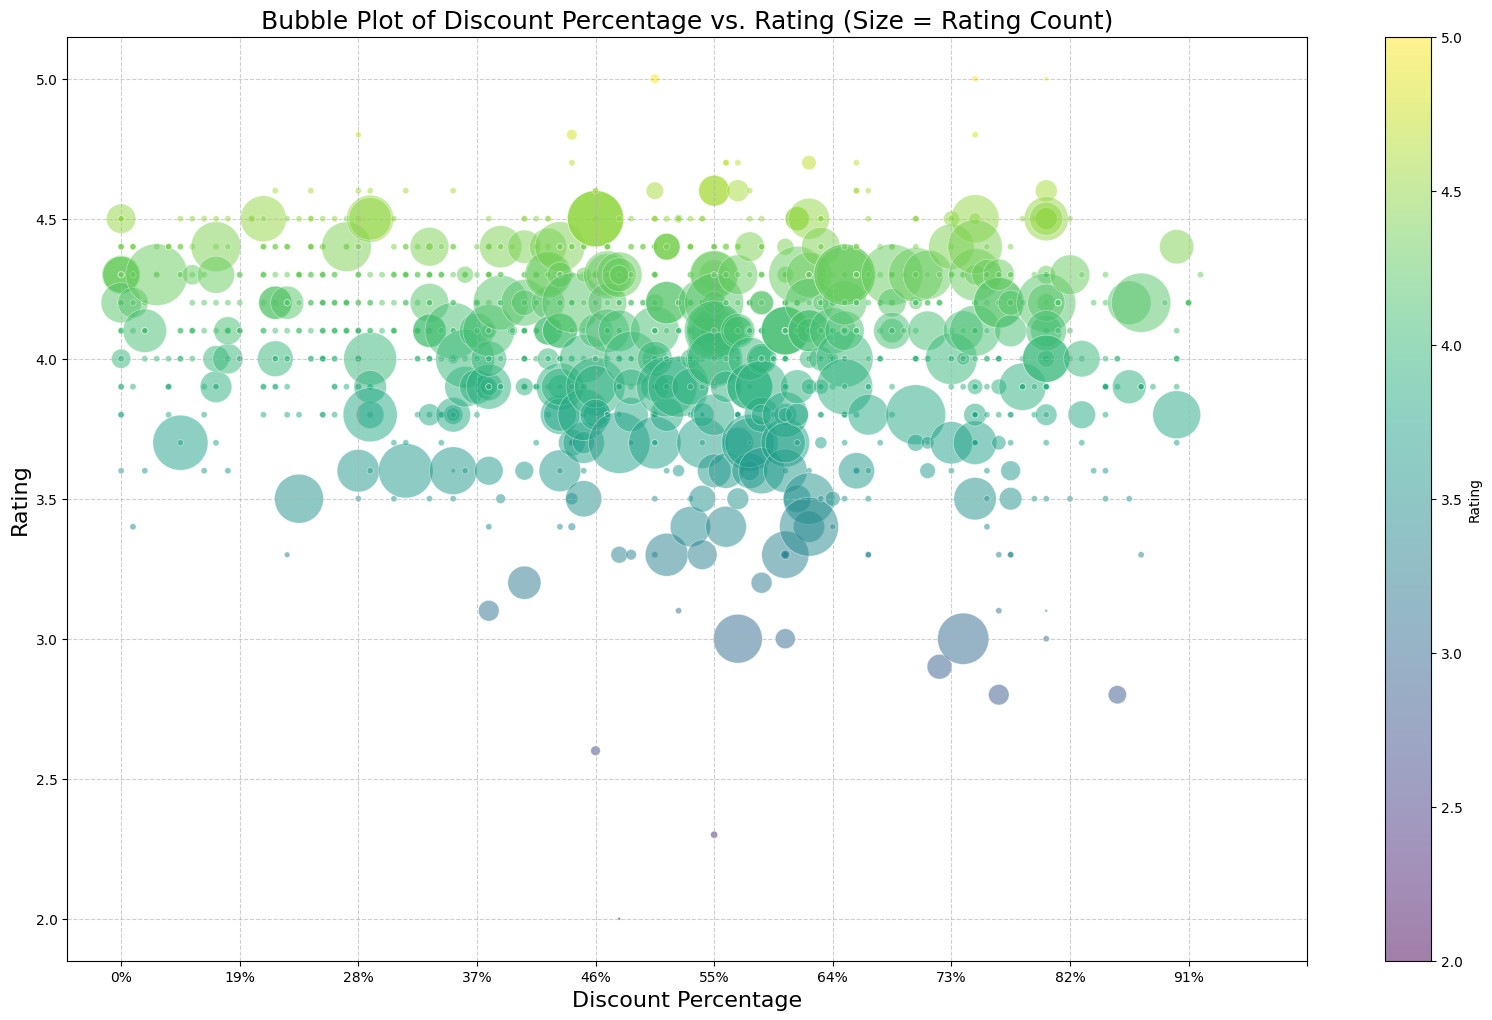

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Convert 'rating' and 'rating_count' to numeric, handle errors
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Fill missing 'rating_count' values
df['rating_count'] = df['rating_count'].fillna(18)

# Sort the dataframe by 'discount_percentage' to avoid jumbled x-axis
df = df.sort_values(by='discount_percentage')

# Bubble plot
plt.figure(figsize=(20, 12))

# Scatter plot with bubble size proportional to 'rating_count'
plt.scatter(df['discount_percentage'], df['rating'], s=df['rating_count'] * 2, alpha=0.5, c=df['rating'], cmap='viridis', edgecolors='w', linewidth=0.5)

# Labels and title
plt.xlabel('Discount Percentage', fontsize=16)
plt.ylabel('Rating', fontsize=16)
plt.title('Bubble Plot of Discount Percentage vs. Rating (Size = Rating Count)', fontsize=18)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.6)

# Set x-ticks to increment by 10%
x_ticks = np.arange(0, 101, 10)  # From 0% to 100% with a step of 10%
plt.xticks(x_ticks)

# Adding a color bar for better understanding of rating intensity
plt.colorbar(label='Rating')

# Show plot
plt.show()


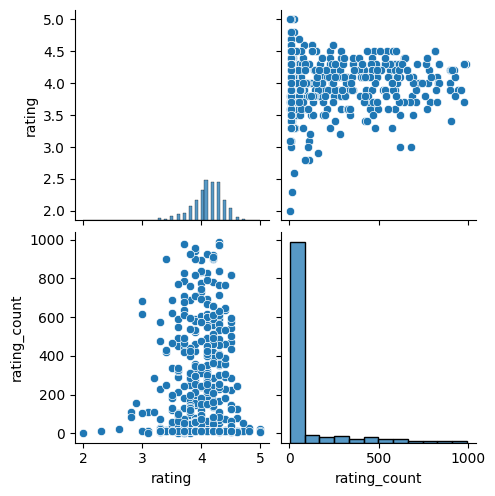

In [51]:
import seaborn as sns

# Create the pairplot
sns.pairplot(df)
plt.show()

Explained Variance Ratio: [0.98701633 0.01298136]
PCA Components: 
[[ 1.14120346e-02 -1.55763434e-04  9.99934868e-01]
 [ 9.99932915e-01 -1.98123981e-03 -1.14123209e-02]]


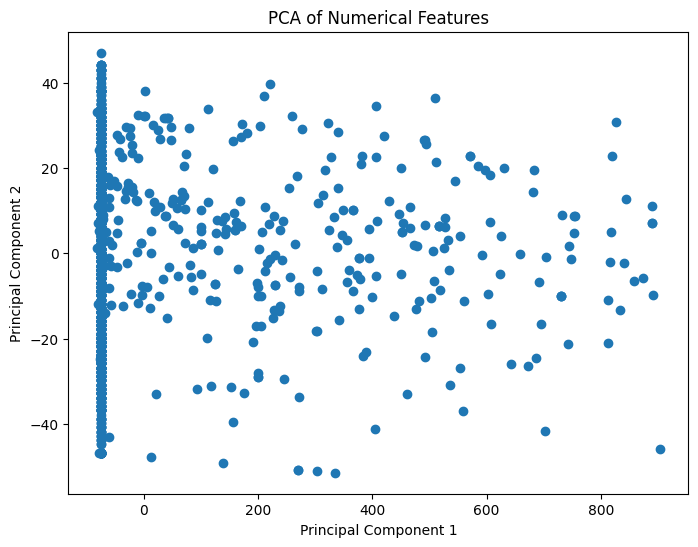

In [37]:


# Select numerical columns for PCA
numerical_cols = ['discount_percentage', 'rating', 'rating_count']  # Replace with your actual column names
df_numerical = df[numerical_cols].dropna() # Handle potential missing values

# Convert 'discount_percentage' to numeric by removing '%' and converting to float
df_numerical['discount_percentage'] = df_numerical['discount_percentage'].str.rstrip('%').astype(float)

# Create and fit the PCA model
pca = decomposition.PCA(n_components=2)  # Reduce to 2 principal components
pca.fit(df_numerical)

# Transform the data to the principal component space
principal_components = pca.transform(df_numerical)


# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")

# PCA components
print(f"PCA Components: \n{pca.components_}")

# Create a new DataFrame for the principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# You can now visualize or further analyze the principal components
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Numerical Features")
plt.show()

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['discount_percentage', 'rating_count']]
y = df['rating']

X['discount_percentage'] = X['discount_percentage'].str.rstrip('%').astype(float)
# Convert 'rating_count' to numeric
X['rating_count'] = pd.to_numeric(X['rating_count'], errors='coerce')
# Convert 'rating' to numeric
y = pd.to_numeric(y, errors='coerce')

# Drop rows with missing values in either X or y
df_cleaned = pd.concat([X, y], axis=1).dropna()  # Drop NaNs from both X and y
X = df_cleaned[['discount_percentage', 'rating_count']]
y = df_cleaned['rating']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


X2 = df[['discount_percentage']]
X2['discount_percentage'] = pd.to_numeric(X2['discount_percentage'].str.rstrip('%'), errors='coerce')

# Drop rows with missing values in either X2 or y2
df_cleaned2 = pd.concat([X2, y], axis=1).dropna() # Drop NaNs from both X2 and y
X2 = df_cleaned2[['discount_percentage']]
y2 = df_cleaned2['rating']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)
y2_pred = model2.predict(X2_test)
mse2 = mean_squared_error(y2_test, y2_pred)
r2_2 = r2_score(y2_test, y2_pred)

print(f"Mean Squared Error (discount_percentage): {mse2}")
print(f"R-squared (discount_percentage): {r2_2}")


Mean Squared Error: 0.07377958206464534
R-squared: 0.03904513846097146
Coefficients: [-0.00197477 -0.00011246]
Intercept: 4.202730588079815
Mean Squared Error (discount_percentage): 0.07492262371260709
R-squared (discount_percentage): 0.02415739583879173


<ipython-input-59-1bc2ac1e1bd5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['discount_percentage'] = X['discount_percentage'].str.rstrip('%').astype(float)
<ipython-input-59-1bc2ac1e1bd5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['rating_count'] = pd.to_numeric(X['rating_count'], errors='coerce')
<ipython-input-59-1bc2ac1e1bd5>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

---
---
**Observations and Results:**
Model Performance:
Mean Squared Error (MSE):

Overall Model: 0.0738

Model with discount_percentage only: 0.0749

Both MSE values are low, meaning that the model predictions are close to the actual values, but improvement is still possible.


---


**R-squared (R²):**

Overall Model: 0.0390

Model with discount_percentage only: 0.0242

These are low R² values, which could indicate that the models are explaining only a very small portion of the variance in the target variable rating. This suggests that the predictors (discount_percentage and rating_count) are not strongly correlated with the target.


---


**Coefficients:**

discount_percentage coefficient: -0.00197477

rating_count coefficient: -0.00011246

These coefficients are both negative, which suggests a slight negative relationship between these features and the target (rating). However, the values are quite small, indicating a weak effect.



---

**Intercept: 4.2027**

This is the predicted value of the rating when both discount_percentage and rating_count are zero. It provides a baseline for the model's predictions.


---



---



Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

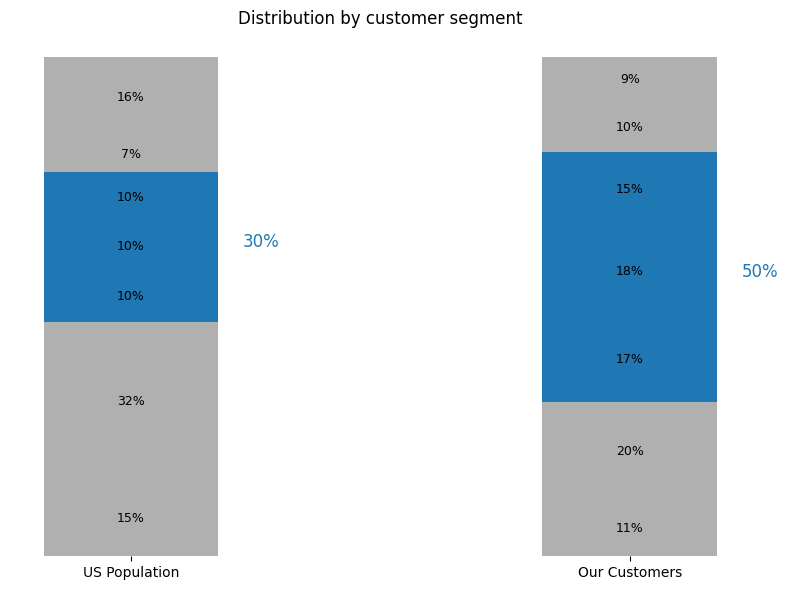

In [50]:
import matplotlib.pyplot as plt

# Segment labels
segments = ['Segment 1', 'Segment 2', 'Segment 3', 'Segment 4', 'Segment 5', 'Segment 6', 'Segment 7']
segments = segments[::-1]  # Reverse for stacking from bottom

# Data (percentages)
us_population = [16, 7, 10, 10, 10, 32, 15][::-1]  # Reverse for stackplot
our_customers = [9, 10, 15, 18, 17, 20, 11][::-1]

# Bar settings
bar_width = 0.35
x = [0, 1]  # Positions for bars: 0=US Pop, 1=Our Customers

# Color mapping
colors = ['#b0b0b0', '#b0b0b0', '#1f77b4', '#1f77b4', '#1f77b4', '#b0b0b0', '#b0b0b0'][::-1]

fig, ax = plt.subplots(figsize=(8, 6))

# Stacked bars
bottom_us = 0
bottom_our = 0

for i in range(len(segments)):
    ax.bar(x[0], us_population[i], bottom=bottom_us, width=bar_width, color=colors[i])
    ax.bar(x[1], our_customers[i], bottom=bottom_our, width=bar_width, color=colors[i])

    # lbel percentages inside the bars
    ax.text(x[0], bottom_us + us_population[i]/2, f"{us_population[i]}%", ha='center', va='center', color='black', fontsize=9)
    ax.text(x[1], bottom_our + our_customers[i]/2, f"{our_customers[i]}%", ha='center', va='center', color='black', fontsize=9)

    bottom_us += us_population[i]
    bottom_our += our_customers[i]

# Add total % for segments 3-5
ax.text(x[0] + bar_width/2 + 0.05, sum(us_population[2:5])/2 + sum(us_population[:2]), '30%', fontsize=12, color='#1f77b4')
ax.text(x[1] + bar_width/2 + 0.05, sum(our_customers[2:5])/2 + sum(our_customers[:2]), '50%', fontsize=12, color='#1f77b4')

# Titles and labels
ax.set_xticks(x)
ax.set_xticklabels(['US Population', 'Our Customers'])
ax.set_title('Distribution by customer segment')

# Remove y-axis and spines
ax.get_yaxis().set_visible(False)
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()
